In [1]:
from pathlib import Path 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from napatrackmater.Trackvector import (TrackVector,
                                        SHAPE_FEATURES, 
                                        DYNAMIC_FEATURES, 
                                        SHAPE_DYNAMIC_FEATURES,
                                        
                                        )

/home/debian/miniconda3/envs/kapoorlabsenv/lib/python3.10/site-packages/kornia/feature/lightglue.py:44: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @torch.cuda.amp.custom_fwd(cast_inputs=torch.float32)
2024-09-03 18:11:17.281536: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-03 18:11:17.308691: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-03 18:11:17.322338: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-03 18:11:17.346447: I tensorflow/core/platform/cpu_feature

In [8]:
dataset_name = 'Second'
home_folder = '/home/debian/jz/'
timelapse_to_track = f'timelapse_{dataset_name.lower()}_dataset'
tracking_directory = f'{home_folder}Mari_Data_Oneat/Mari_{dataset_name}_Dataset_Analysis/nuclei_membrane_tracking/'
channel = 'nuclei_'
data_frames_dir = os.path.join(tracking_directory, f'dataframes/')
save_dir = os.path.join(tracking_directory, f'cell_fate_accuracy/')
Path(save_dir).mkdir(exist_ok=True)
master_xml_name = 'master_' + 'marching_cubes_filled_' + channel + timelapse_to_track + ".xml"
xml_path = Path(os.path.join(tracking_directory, master_xml_name))
  
goblet_cells_file = f'{home_folder}Mari_Data_Oneat/Mari_{dataset_name}_Dataset_Analysis/annotations_predicted_tracklet_length_25_t_initial_100_t_final_200/goblet_cells_{channel}annotations_inception.csv'
basal_cells_file = f'{home_folder}Mari_Data_Oneat/Mari_{dataset_name}_Dataset_Analysis/annotations_predicted_tracklet_length_25_t_initial_100_t_final_200/basal_cells_{channel}annotations_inception.csv'
radial_cells_file = f'{home_folder}Mari_Data_Oneat/Mari_{dataset_name}_Dataset_Analysis/annotations_predicted_tracklet_length_25_t_initial_100_t_final_200/radially_intercalating_cells_{channel}annotations_inception.csv'

goblet_cells_dataframe = pd.read_csv(goblet_cells_file)
basal_cells_dataframe = pd.read_csv(basal_cells_file)
radial_cells_dataframe = pd.read_csv(radial_cells_file)



gt_goblet_cells_file = f'{home_folder}Mari_Data_Oneat/Mari_{dataset_name}_Dataset_Analysis/annotations/goblet_cells_{channel}annotations.csv'
gt_basal_cells_file = f'{home_folder}Mari_Data_Oneat/Mari_{dataset_name}_Dataset_Analysis/annotations/basal_cells_{channel}annotations.csv'
gt_radial_cells_file = f'{home_folder}Mari_Data_Oneat/Mari_{dataset_name}_Dataset_Analysis/annotations/radially_intercalating_cells_{channel}annotations.csv'

gt_goblet_cells_dataframe = pd.read_csv(gt_goblet_cells_file)
gt_basal_cells_dataframe = pd.read_csv(gt_basal_cells_file)
gt_radial_cells_dataframe = pd.read_csv(gt_radial_cells_file)


In [3]:
track_vectors = TrackVector(master_xml_path=xml_path)
track_vectors.t_minus = 0
track_vectors.t_plus = track_vectors.tend
track_vectors.y_start = 0
track_vectors.y_end = track_vectors.ymax
track_vectors.x_start = 0
track_vectors.x_end = track_vectors.xmax

track_vectors._interactive_function()

Reading Master XML
Iterating over spots in frame
Iterating over tracks 4275
getting attributes
returning shape and dynamic vectors as list 6872


In [9]:



globlet_track_ids = track_vectors._get_trackmate_ids_by_location(goblet_cells_dataframe)
print(f'Trackmate IDs for globlet cells {globlet_track_ids}')
basal_track_ids = track_vectors._get_trackmate_ids_by_location(basal_cells_dataframe)
print(f'Trackmate IDs for basal cells {basal_track_ids}')
radial_track_ids = track_vectors._get_trackmate_ids_by_location(radial_cells_dataframe)
print(f'Trackmate IDs for radial cells {radial_track_ids}')



Trackmate IDs for globlet cells ['2962', '3613', '1785', '3251', '1907', '2538', '2215', '446', '472', '2796', '2636', '330', '505', '2447', '3214', '2957', '1415', '3577', '2418', '3603', '2907', '3638', '3513', '3757', '3905', '3986', '4346', '4022', '2776', '4226', '4210', '3960', '4105', '4082', '2776', '4018', '3869', '3044', '3957', '4035', '4029', '3988', '3929', '3969', '4161', '4136', '4405', '4310', '4619', '4546', '4367', '4286', '4408', '4588', '4534', '4305', '4263', '4839', '4435', '3738', '4384', '4462', '4454', '4401', '4689', '4335', '4742', '4499', '4302', '4593', '4420', '4442', '4362', '4664', '4389', '2098', '4275', '4332', '4427', '4594', '4486', '4529', '4614', '4533', '4477', '4274', '4368', '4531', '4449', '4526', '4530', '4541', '4518', '4522', '4679', '4697', '4671', '4359', '4695', '4668', '4768', '4780', '4764', '4787', '4706', '4699', '3978', '4722', '4727', '4741', '4736', '4715', '4711', '4767', '4659', '4972', '5004', '5021', '5054', '5067', '5066', '50

In [5]:
gt_globlet_track_ids = track_vectors._get_trackmate_ids_by_location(gt_goblet_cells_dataframe)
print(f'GT Trackmate IDs for globlet cells {gt_globlet_track_ids}')
gt_basal_track_ids = track_vectors._get_trackmate_ids_by_location(gt_basal_cells_dataframe)
print(f'GT Trackmate IDs for basal cells {gt_basal_track_ids}')
gt_radial_track_ids = track_vectors._get_trackmate_ids_by_location(gt_radial_cells_dataframe)
print(f'GT Trackmate IDs for radial cells {gt_radial_track_ids}')

GT Trackmate IDs for globlet cells ['6036', '8169', '6375', '4463', '4435', '6267', '3738', '5738', '5845', '5901', '8053', '6626', '6601', '6127', '7089', '3044', '6878', '8051', '4541', '4335', '7040', '5225', '6679', '7013', '7277', '6545', '6725', '7080', '2098', '5858', '6667', '6627', '6570', '6574', '5336', '6670', '6563', '6174', '6815', '6768', '6581', '6548', '8304', '6500', '6043', '7500', '6544', '6458', '6966', '6967', '6788', '7463', '8075', '8259', '4408', '6160', '7149', '8095', '6314', '5245', '6980', '8066', '4367', '5869', '7343', '6285', '1736', '7486', '6092', '7514', '7287', '6041', '5986', '6184', '5986', '5436', '4018', '6065', '6522', '5997', '6232', '6292', '8062', '2962', '5958', '5793', '6237', '5903', '6706', '8347', '6253', '5747', '5585', '5595', '6132', '5789', '5749', '2636', '7436', '6938', '7124', '6993', '6080', '6924', '5949', '7259', '7683', '5421', '2776', '330', '6121', '6469', '8478', '6260', '5849', '5807']
GT Trackmate IDs for basal cells ['61

Globlet Cells - TP: 2, FN: 113
Basal Cells - TP: 74, FN: 113
Radial Cells - TP: 7, FN: 35

Confusion Matrix:
Category   TP    FN   
Globlet    2     113  
Basal      74    113  
Radial     7     35   


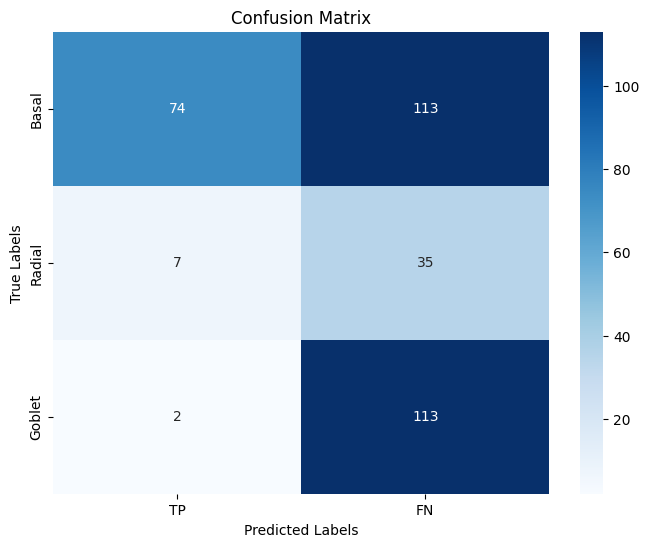

In [ ]:
class_map_gbr = {
    0: "Basal",
    1: "Radial",
    2: "Goblet"
}
def compute_tp_fn(predicted_ids, gt_ids):
    tp = len(set(predicted_ids) & set(gt_ids))
    fn = len(set(gt_ids) - set(predicted_ids))
    return tp, fn

# Compute TP and FN for each category
tp_globlet, fn_globlet = compute_tp_fn(globlet_track_ids, gt_globlet_track_ids)
tp_basal, fn_basal = compute_tp_fn(basal_track_ids, gt_basal_track_ids)
tp_radial, fn_radial = compute_tp_fn(radial_track_ids, gt_radial_track_ids)

# Print results
print(f'Globlet Cells - TP: {tp_globlet}, FN: {fn_globlet}')
print(f'Basal Cells - TP: {tp_basal}, FN: {fn_basal}')
print(f'Radial Cells - TP: {tp_radial}, FN: {fn_radial}')

# Create a confusion matrix
confusion_matrix = {
    'Category': ['Globlet', 'Basal', 'Radial'],
    'TP': [tp_globlet, tp_basal, tp_radial],
    'FN': [fn_globlet, fn_basal, fn_radial]
}

print("\nConfusion Matrix:")
print("{:<10} {:<5} {:<5}".format('Category', 'TP', 'FN'))
for i in range(len(confusion_matrix['Category'])):
    print("{:<10} {:<5} {:<5}".format(confusion_matrix['Category'][i], confusion_matrix['TP'][i], confusion_matrix['FN'][i]))


conf_matrix_array = np.array([
    [tp_basal, fn_basal],
    [tp_radial, fn_radial],
    [tp_globlet,fn_globlet]
])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
class_names = list(class_map_gbr.values())
sns.heatmap(conf_matrix_array, annot=True, fmt='d', cmap='Blues', xticklabels=['TP', 'FN'], yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()    


Globlet Cells - TP: 1.72%, FN: 97.41%
Basal Cells - TP: 36.63%, FN: 55.94%
Radial Cells - TP: 16.67%, FN: 83.33%


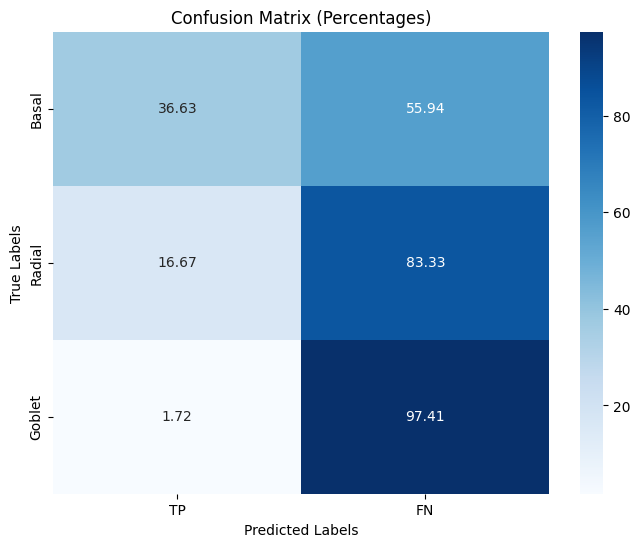

In [ ]:
# Total ground truth counts for each category
total_globlet = len(gt_globlet_track_ids)
total_basal = len(gt_basal_track_ids)
total_radial = len(gt_radial_track_ids)

# Calculate percentages
percent_tp_globlet = (tp_globlet / total_globlet) * 100 if total_globlet > 0 else 0
percent_fn_globlet = (fn_globlet / total_globlet) * 100 if total_globlet > 0 else 0

percent_tp_basal = (tp_basal / total_basal) * 100 if total_basal > 0 else 0
percent_fn_basal = (fn_basal / total_basal) * 100 if total_basal > 0 else 0

percent_tp_radial = (tp_radial / total_radial) * 100 if total_radial > 0 else 0
percent_fn_radial = (fn_radial / total_radial) * 100 if total_radial > 0 else 0

# Print results
print(f'Globlet Cells - TP: {percent_tp_globlet:.2f}%, FN: {percent_fn_globlet:.2f}%')
print(f'Basal Cells - TP: {percent_tp_basal:.2f}%, FN: {percent_fn_basal:.2f}%')
print(f'Radial Cells - TP: {percent_tp_radial:.2f}%, FN: {percent_fn_radial:.2f}%')

# Create a confusion matrix array
conf_matrix_array = np.array([
    [percent_tp_basal, percent_fn_basal],
    [percent_tp_radial, percent_fn_radial],
    [percent_tp_globlet, percent_fn_globlet]
])

save_path = Path(goblet_cells_file).parent.stem
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
class_names = list(class_map_gbr.values())
sns.heatmap(conf_matrix_array, annot=True, fmt='.2f', cmap='Blues', xticklabels=['TP', 'FN'], yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Percentages)')
plt.savefig(os.path.join(save_dir,save_path + '.png'))
plt.show()